In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.renderers.enable('notebook')
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [2]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

Analyze the protein abundance of PIK3CA with and without mutation

In [3]:
gene = 'PIK3CA'
protList = ['PIK3CA']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
Test for PIK3CA: 
Ttest_indResult(statistic=-2.3709474235794348, pvalue=0.019698800138688424)


In [4]:
cross.head()

,PIK3CA,PIK3CAprotein
S001,1.0,-0.51
S002,0.0,-0.19
S003,1.0,-0.20
S004,0.0,-0.65
S005,0.0,0.39


In [5]:
cross.sum(axis=0)

PIK3CA           42.00
PIK3CAprotein   -15.67
dtype: float64

[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

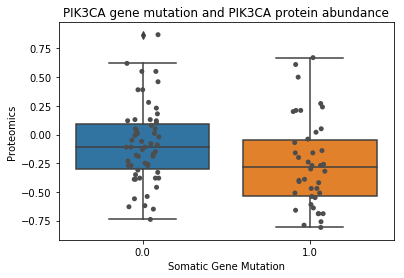

In [6]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

Analyze phosphorylation levels 

In [7]:
phosProt = phos.filter(regex='PIK3CA')
gene = 'PIK3CA'

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(phosProt, fill_value = 0)
sigResults = []
#print(cross.head())

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

mutated = cross.loc[cross[gene] == 1.0]
#print(mutated.head())
wt = cross.loc[cross[gene] == 0.0]
#print(wt.head())

for loc in cross.columns:
    if not loc == gene:
        oneSitedf_m = mutated[[gene, loc]].dropna()
        oneSitedf_wt = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(oneSitedf_m[loc], oneSitedf_wt[loc])
        sigResults.append(loc)
        print("Results for " + loc)
        print(ttest)

0.016666666666666666
Results for PIK3CA-S312
Ttest_indResult(statistic=-2.0586037244067628, pvalue=0.04437026599246959)
Results for PIK3CA-T313
Ttest_indResult(statistic=-2.305191880117805, pvalue=0.02543138411734351)


In [8]:
cross.sum(axis=0)

PIK3CA         42.00
PIK3CA-S312    -0.48
PIK3CA-T313    -3.20
dtype: float64

In [10]:
cross.head(40)

,PIK3CA,PIK3CA-S312,PIK3CA-T313
S001,1.0,-0.06,-0.44
S002,0.0,-0.04,NaN
S003,1.0,NaN,0.18
S004,0.0,NaN,-0.81
S005,0.0,0.47,NaN
S006,0.0,0.19,NaN
S007,0.0,-0.12,NaN
S008,1.0,NaN,NaN
S009,0.0,0.04,NaN
S010,0.0,-0.20,NaN


[Text(0, 0.5, 'Phosphoproteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

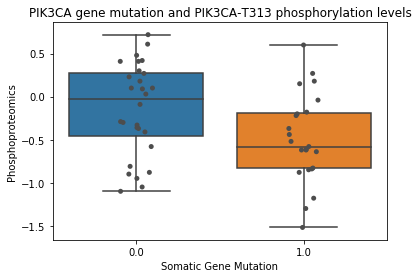

In [12]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=sigResults[1])
somatic_boxplot.set_title(gene + " gene mutation and " + sigResults[1] + " phosphorylation levels")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=sigResults[1],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")